In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller, pacf
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.holtwinters import SimpleExpSmoothing


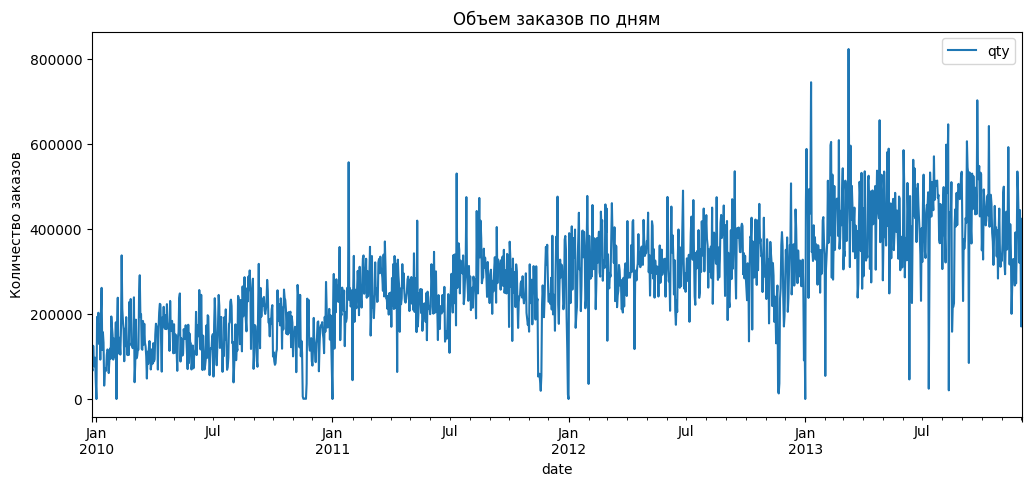

In [3]:
# Загрузка временного ряда
df = pd.read_csv("tovar_moving.csv", parse_dates=["date"])
df = df.sort_values("date")
df.set_index("date", inplace=True)

# Просмотр данных
df.plot(figsize=(12, 5), title="Объем заказов по дням")
plt.ylabel("Количество заказов")
plt.show()


In [4]:
train = df.iloc[:-1]
test = df.iloc[-1:]

print("Последнее значение (test):")
print(test)


Последнее значение (test):
                 qty
date                
2013-12-02  423846.0


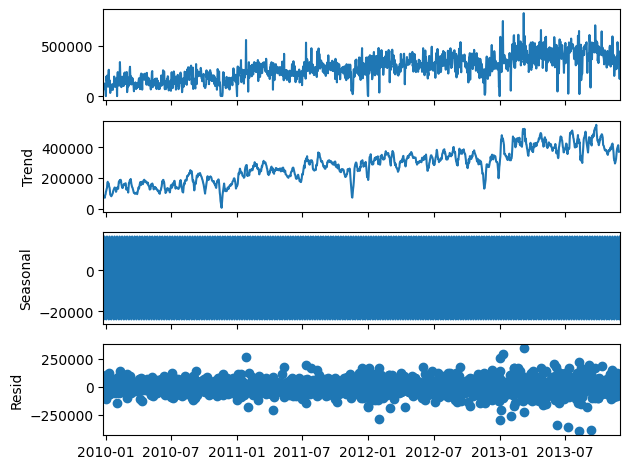

In [5]:
from statsmodels.tsa.seasonal import seasonal_decompose

decompose_result = seasonal_decompose(df, model='additive', period=7)  # если данные по дням
decompose_result.plot()
plt.tight_layout()
plt.show()


In [6]:
model_exp = SimpleExpSmoothing(train).fit(smoothing_level=0.7, optimized=False)
forecast_exp = model_exp.forecast(1)

print("Прогноз:", forecast_exp.values[0])
print("Фактическое значение:", test.values[0][0])


Прогноз: 225015.5226471296
Фактическое значение: 423846.0


c:\Users\xenov\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [7]:
result_adf = adfuller(train['qty'])

print(f"ADF statistic: {result_adf[0]}")
print(f"p-value: {result_adf[1]}")


ADF statistic: -2.2553026410337953
p-value: 0.18678903123416607


In [8]:
# Разностный ряд
diff = train['qty'].diff().dropna()

# Повторная проверка
adf_diff = adfuller(diff)
print(f"ADF (разности): {adf_diff[0]}, p-value: {adf_diff[1]}")


ADF (разности): -13.780727380503894, p-value: 9.307227521335782e-26


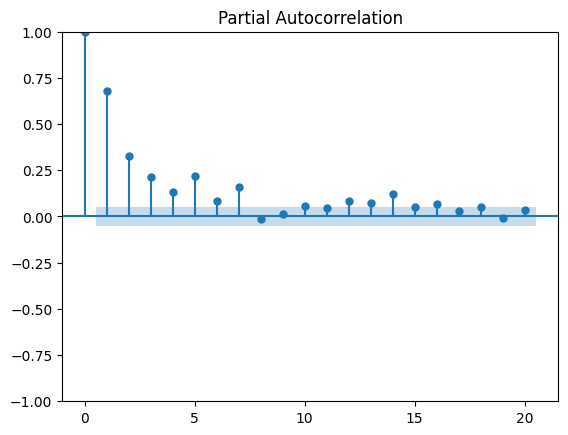

In [9]:
from statsmodels.graphics.tsaplots import plot_pacf

plot_pacf(train['qty'], lags=20)
plt.show()


In [10]:
ar_model = AutoReg(train['qty'], lags=2).fit()  # замените на нужное количество лагов
forecast_ar = ar_model.predict(start=len(train), end=len(train))

print("AR-прогноз:", forecast_ar.values[0])
print("Фактическое значение:", test.values[0][0])


AR-прогноз: 244842.0539491113
Фактическое значение: 423846.0


c:\Users\xenov\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\xenov\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\deterministic.py:308: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)


In [11]:
error_exp = abs(test.values[0][0] - forecast_exp.values[0])
error_ar = abs(test.values[0][0] - forecast_ar.values[0])

print(f"Ошибка эксп. сглаживания: {error_exp:.2f}")
print(f"Ошибка AR модели: {error_ar:.2f}")


Ошибка эксп. сглаживания: 198830.48
Ошибка AR модели: 179003.95


Вывод:
Простые методы сглаживания могут быть полезны, но часто уступают по точности моделям, учитывающим внутреннюю структуру временного ряда.
AR-модель оказалась более точной, поскольку учитывает автокорреляции значений.